<AxesSubplot:xlabel='x', ylabel='y'>

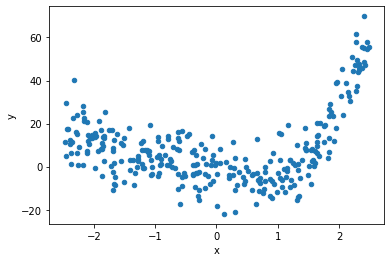

In [2]:
import numpy as np
import pandas as pd

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_test.shape, X_train.shape)

(60,) (240,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
#print(X_train)
#print(X_train.reshape(-1, 1).shape)

lin_reg.fit(X_train.reshape(-1, 1), y_train)
X_new = np.array([[0], [2]])
print(X_new)

print(lin_reg.intercept_, lin_reg.coef_, "\n",
lin_reg.predict(X_new))

lin_train_mse = mean_squared_error(y_train, lin_reg.predict(X_train.reshape(-1,1)))
lin_test_mse = mean_squared_error(y_test, lin_reg.predict(X_test.reshape(-1,1)))
print(lin_train_mse, lin_test_mse)

[[0]
 [2]]
9.162423279739965 [3.55444995] 
 [ 9.16242328 16.27132318]
247.37046987465052 235.9535099113078


In [74]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(
n_neighbors=3)
knn_3_reg.fit(X_train.reshape(-1, 1), y_train)
print(knn_3_reg.predict(X_new))

knn3_train_mse = mean_squared_error(y_train, knn_3_reg.predict(X_train.reshape(-1,1)))
knn3_test_mse = mean_squared_error(y_test, knn_3_reg.predict(X_test.reshape(-1,1)))
print(knn3_train_mse, knn3_test_mse)


[-6.63779901 34.24519056]
45.00303018523787 88.11011684540398


In [75]:
import sklearn.neighbors
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(
n_neighbors=5)
knn_5_reg.fit(X_train.reshape(-1, 1), y_train)
print(knn_reg.predict(X_new))

knn5_train_mse = mean_squared_error(y_train, knn_5_reg.predict(X_train.reshape(-1,1)))
knn5_test_mse = mean_squared_error(y_test, knn_5_reg.predict(X_test.reshape(-1,1)))
print(knn5_train_mse, knn5_test_mse)

[-3.48101254 27.70031503]
53.10877331497279 98.24288461876272


-0.6160499177339063 [-0.61604992  0.3795175 ]
-4.994083134911614 [3.44095874 6.31857527]
[-4.99408313 27.16213543]
27.162135432602525
107.01711248217705 114.58248333580728


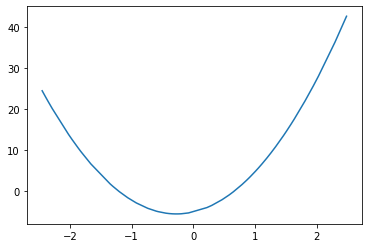

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly_feature_2.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly_feature_2.fit_transform(X_test.reshape(-1,1))


print(X_train[0], X_poly[0])
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_train, y_train)
print(poly_2_reg.intercept_, poly_2_reg.coef_)
print(poly_2_reg.predict(poly_feature_2.fit_transform([[0],[2]])))
print(poly_2_reg.coef_[1] * 2**2 + poly_2_reg.coef_[0] * 2 + poly_2_reg.intercept_)

poly2_train_mse = mean_squared_error(y_train, poly_2_reg.predict((X_poly_train)))
poly2_test_mse = mean_squared_error(y_test, poly_2_reg.predict((X_poly_test)))
print(poly2_train_mse, poly2_test_mse)

import matplotlib.pyplot as plt
X_sort = pd.Series(X_test).sort_values()
y_sort = pd.Series(poly_2_reg.predict((X_poly_test))).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

-0.6160499177339063 [-0.61604992  0.3795175 ]
-5.360679682873451 [-6.81432524  6.38949195  2.69094965]
[-5.36067968 28.09623485]
6.568637629516678
65.48120620576483 95.47758491413316


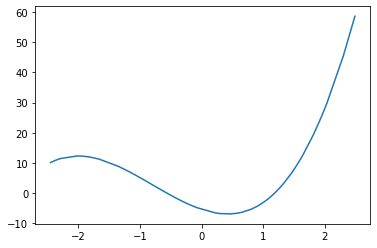

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature_3.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly_feature_3.fit_transform(X_test.reshape(-1,1))
print(X_train[0], X_poly[0])
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_train, y_train)
print(poly_3_reg.intercept_, poly_3_reg.coef_)
print(poly_3_reg.predict(poly_feature_3.fit_transform([[0],[2]])))
print(poly_3_reg.coef_[1] * 2**2 + poly_3_reg.coef_[0] * 2 + poly_3_reg.intercept_)

poly3_train_mse = mean_squared_error(y_train, poly_3_reg.predict((X_poly_train)))
poly3_test_mse = mean_squared_error(y_test, poly_3_reg.predict((X_poly_test)))
print(poly3_train_mse, poly3_test_mse)

import matplotlib.pyplot as plt
X_sort = pd.Series(X_test).sort_values()
y_sort = pd.Series(poly_3_reg.predict((X_poly_test))).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

-0.6160499177339063 [-0.61604992  0.3795175 ]
-2.7041768661425767 [-6.53702216  2.45080687  2.61695449  0.72321566]
[-2.70417687 26.53209283]
-5.9749937202887065
60.92676691097588 84.10986399703053


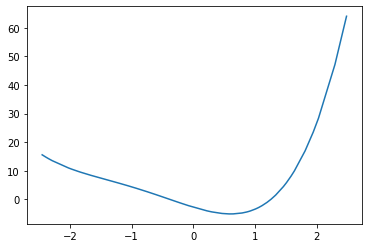

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train = poly_feature_4.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly_feature_4.fit_transform(X_test.reshape(-1,1))
print(X_train[0], X_poly[0])
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_train, y_train)
print(poly_4_reg.intercept_, poly_4_reg.coef_)
print(poly_4_reg.predict(poly_feature_4.fit_transform([[0],[2]])))
print(poly_4_reg.coef_[1] * 2**2 + poly_4_reg.coef_[0] * 2 + poly_4_reg.intercept_)

poly4_train_mse = mean_squared_error(y_train, poly_4_reg.predict((X_poly_train)))
poly4_test_mse = mean_squared_error(y_test, poly_4_reg.predict((X_poly_test)))
print(poly4_train_mse, poly4_test_mse)
import matplotlib.pyplot as plt
X_sort = pd.Series(X_test).sort_values()
y_sort = pd.Series(poly_4_reg.predict((X_poly_test))).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

-0.6160499177339063 [-0.61604992  0.3795175 ]
-2.7857564926203224 [-7.68452099  2.49330413  3.45906099  0.72015023 -0.12069419]
[-2.78575649 27.15109561]
-8.181581975700253
60.73413927805975 83.71052090022594


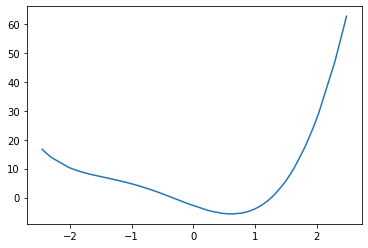

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_train = poly_feature_5.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly_feature_5.fit_transform(X_test.reshape(-1,1))
print(X_train[0], X_poly[0])
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_train, y_train)
print(poly_5_reg.intercept_, poly_5_reg.coef_)
print(poly_5_reg.predict(poly_features.fit_transform([[0],[2]])))
print(poly_5_reg.coef_[1] * 2**2 + poly_5_reg.coef_[0] * 2 + poly_5_reg.intercept_)

poly5_train_mse = mean_squared_error(y_train, poly_5_reg.predict((X_poly_train)))
poly5_test_mse = mean_squared_error(y_test, poly_5_reg.predict((X_poly_test)))
print(poly5_train_mse, poly5_test_mse)
import matplotlib.pyplot as plt
X_sort = pd.Series(X_test).sort_values()
y_sort = pd.Series(poly_5_reg.predict((X_poly_test))).reindex(X_sort.index)
plt.plot(X_sort, y_sort)

In [103]:
reg = list()
reg.append((lin_reg, None))
reg.append((knn_3_reg, None))
reg.append((knn_5_reg, None))
reg.append((poly_2_reg, poly_feature_2))
reg.append((poly_3_reg, poly_feature_3))
reg.append((poly_4_reg, poly_feature_4))
reg.append((poly_5_reg, poly_feature_5))
print(reg)

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
